In [1]:
import os 
import json 
import numpy as np 
import matplotlib.pyplot as plt

In [7]:
paths = [
    "trained_models/mlora-r8-a16-3e4-h4", 
    "trained_models/mlora-r4-a8-3e4-h4",
    "trained_models/mlora-r4-a8-3e4", "trained_models/base-mlora-r4-a8-3e4", 
    "trained_models/base-mlora-r32-a64-3e4", "trained_models/base-mlora-r64-a128-3e4"]
labels = ["HMLora-8-h4", "HMLora-4-h4", "HMLora-4", "base-4", "base-32", "base-64"]

In [8]:
loss_curves = {}
for path, label in zip(paths, labels):
    filenames = os.listdir(path)
    filenames = [f for f in filenames if f.startswith("checkpoint")]
    filename = f"checkpoint-{max([int(f.split('-')[1]) for f in filenames])}"
    with open(f"{path}/{filename}/trainer_state.json", "r") as f:
        trainer_state = json.load(f)
    loss_curves[label] = [item['eval_loss']  for item in trainer_state["log_history"] if 'eval_loss' in item]

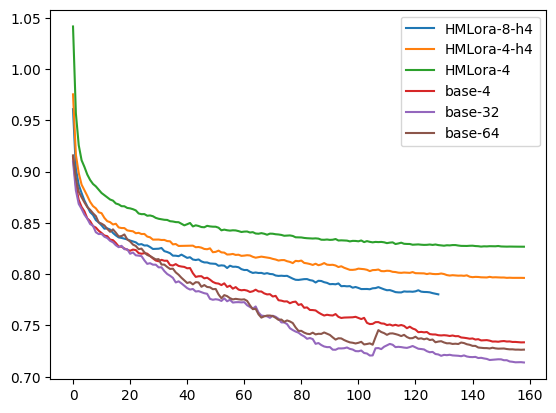

In [9]:
for label, loss_curve in loss_curves.items():
    plt.plot(np.arange(len(loss_curve)), loss_curve, label=label)
plt.legend()